In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import ghibtools as gh
from params import *

%matplotlib inline

**L'idée est d'explorer la survenue des spindle sur la respi, sur les cycles respi non stretchés, et donc de vraiment explorer quand se situent préférentiellement les spindle par rapport à des évènements respiratoires particuliers tels que la transition i vers e ou e vers i**

**Il faut donc découper les TF autour de ces évènements particuliers, avec une fenêtre qui entoure ces évènements .. à définir**

**Il faut donc :**
- Charger les rsp_features pour avoir les moments des transitions
- Charger les TF
- Fenêtrer les TF autour des transitions

In [54]:
mode = 'load'

In [4]:
participants = patients

## DATA LOADING

In [48]:
def load_rsp(participants=participants):
    concat = []
    for participant in participants:
        rsp = pd.read_excel(f'../df_analyse/resp_features_encoded_{participant}.xlsx', index_col = 0).loc[:,['participant', 'inspi_index','expi_index', 'inspi_time','expi_time', 'cycle_duration','insp_duration','exp_duration','event']]
        concat.append(rsp)
    df_return = pd.concat(concat)
    return df_return

In [49]:
rsp = load_rsp()

In [50]:
rsp

,participant,inspi_index,expi_index,inspi_time,expi_time,cycle_duration,insp_duration,exp_duration,event
0,P1,155,434,0.605469,1.695312,2.960938,1.089844,1.871094,0
1,P1,913,1202,3.566406,4.695312,3.140625,1.128906,2.011719,0
2,P1,1717,1996,6.707031,7.796875,3.136719,1.089844,2.046875,0
3,P1,2520,2795,9.843750,10.917969,3.140625,1.074219,2.066406,0
4,P1,3324,3557,12.984375,13.894531,2.535156,0.910156,1.625000,0
...,...,...,...,...,...,...,...,...,...
3302,P10,3351173,3351466,13090.519531,13091.664062,3.199219,1.144531,2.054688,0
3303,P10,3351992,3352298,13093.718750,13094.914062,3.359375,1.195312,2.164062,0
3304,P10,3352852,3353141,13097.078125,13098.207031,3.226562,1.128906,2.097656,0
3305,P10,3353678,3353963,13100.304688,13101.417969,3.203125,1.113281,2.089844,0


In [51]:
half_window_size = round(rsp['exp_duration'].quantile(0.75), 1) # les fenetres comprendront la majorité du cycle respi
half_wsize_points = int(half_window_size * srate)

In [52]:
half_wsize_points

358

In [55]:
half_window_size

2.8

In [56]:
def load_tf(participants=participants):
    concat = []
    for participant in participants:
        print(participant)
        tf = xr.load_dataarray(f'../dataarray/da_tf_frontal_{participant}.nc').astype('float32')
        concat.append(tf)
    da_return = xr.concat(concat, dim = 'participant')
    da_return = da_return.assign_coords({'participant':participants})
    return da_return

In [57]:
if mode == 'save':
    da = load_tf()
    da.to_netcdf(f'../dataarray/da_tf_frontal_all.nc')
elif mode == 'load':
    da = xr.load_dataarray(f'../dataarray/da_tf_frontal_all.nc')

In [58]:
da

<xarray.DataArray (participant: 9, freqs: 40, time: 2376960)>
array([[[2.50612715e+04, 2.55806035e+04, 2.58901387e+04, ...,
                    nan,            nan,            nan],
        [2.35207695e+04, 2.39984922e+04, 2.42807246e+04, ...,
                    nan,            nan,            nan],
        [2.18913770e+04, 2.23071855e+04, 2.25397344e+04, ...,
                    nan,            nan,            nan],
        ...,
        [4.60722998e+03, 4.57116602e+03, 4.48800195e+03, ...,
                    nan,            nan,            nan],
        [4.59891699e+03, 4.56972363e+03, 4.49369873e+03, ...,
                    nan,            nan,            nan],
        [4.60669385e+03, 4.58544922e+03, 4.51751074e+03, ...,
                    nan,            nan,            nan]],

       [[1.05402227e+05, 1.05095344e+05, 1.03736156e+05, ...,
         3.04025273e+04, 3.17456055e+04, 3.27889141e+04],
        [1.01430883e+05, 1.01246992e+05, 1.00058617e+05, ...,
         2.80542637e+04, 2.93148750e+04, 3.03057793e+04],
        [9.77243281e+04, 9.76418516e+04, 9.65971797e+04, ...,
         2.60406484e+04, 2.72258887e+04, 2.81672207e+04],
...
        [1.00372432e+04, 1.01470283e+04, 1.01575586e+04, ...,
                    nan,            nan,            nan],
        [9.48030078e+03, 9.55114746e+03, 9.52434375e+03, ...,
                    nan,            nan,            nan],
        [8.97213672e+03, 9.01438867e+03, 8.96178418e+03, ...,
                    nan,            nan,            nan]],

       [[2.83997631e+01, 1.88306541e+01, 1.20238256e+01, ...,
                    nan,            nan,            nan],
        [1.99086361e+01, 1.07523022e+01, 4.23592281e+00, ...,
                    nan,            nan,            nan],
        [3.22466812e+01, 2.43530388e+01, 1.87970963e+01, ...,
                    nan,            nan,            nan],
        ...,
        [4.65298126e+02, 4.59088562e+02, 4.46789612e+02, ...,
                    nan,            nan,            nan],
        [4.46182343e+02, 4.41412689e+02, 4.31113800e+02, ...,
                    nan,            nan,            nan],
        [4.35286591e+02, 4.32824554e+02, 4.25382050e+02, ...,
                    nan,            nan,            nan]]], dtype=float32)
Coordinates:
  * time         (time) float64 0.0 0.007812 0.01562 ... 1.857e+04 1.857e+04
  * freqs        (freqs) float64 10.0 10.26 10.51 10.77 ... 19.49 19.74 20.0
  * participant  (participant) object 'P1' 'P2' 'P3' 'P4' ... 'P7' 'P9' 'P10'

In [59]:
n_cycles_to_compute = {}
for participant in participants:
    n_cycles_to_compute[participant] = rsp[(rsp['participant'] == participant) & (rsp['event'] == 1)].reset_index(drop=True).shape[0]
min_n_cycles_to_compute = min(n_cycles_to_compute.values())

In [60]:
min_n_cycles_to_compute

430

In [85]:
srate = 128

da_erp = None

for participant_idx, participant in enumerate(participants):
    print(participant)

    rsp_participant = rsp[(rsp['participant'] == participant) & (rsp['event'] == 1)].reset_index(drop=True)

    da_participant = da.sel(participant = participant).dropna(dim = 'time')
    
    for transition_idx, transition in enumerate(['i-e','e-i']):
        
        if transition == 'i-e':
            timings = list(rsp_participant['expi_time'])
        elif transition == 'e-i':
            timings = list(rsp_participant['inspi_time'])
        
        for cycle, timing in enumerate(timings):
            if cycle == min_n_cycles_to_compute:
                break
                
            start_t = round(timing, 2) - half_window_size
            
            if start_t <= 0:
                continue
            stop_t = start_t + half_window_size*2

            wsize_in_points = int(half_wsize_points*2)
            start_idx = int(start_t * srate)
            stop_idx = start_idx + wsize_in_points
            
            # print(stop_idx - start_idx)
            
            tf_sliced = da_participant[  : , start_idx:stop_idx].values
            
            if da_erp is None:
                da_erp = gh.init_da({'participant':participants, 'cycle':np.arange(0,min_n_cycles_to_compute,1), 'transition':['i-e','e-i'] , 'freqs':da.coords['freqs'] , 'time':np.arange(0, wsize_in_points, 1)})
            
            da_erp[participant_idx, cycle , transition_idx  , : , :] = tf_sliced

P1
P2
P3
P4
P5
P6
P7
P9
P10


In [86]:
da_erp

<xarray.DataArray (participant: 9, cycle: 430, transition: 2, freqs: 40, time: 716)>
array([[[[[1.06494006e+03, 9.80243408e+02, 9.02198914e+02, ...,
           6.16160950e+02, 6.84244812e+02, 7.49890808e+02],
          [1.17994128e+03, 1.07421069e+03, 9.76683472e+02, ...,
           6.62965027e+02, 7.25579834e+02, 7.85654541e+02],
          [1.24278528e+03, 1.11403601e+03, 9.94897583e+02, ...,
           7.19064819e+02, 7.73823242e+02, 8.25906372e+02],
          ...,
          [8.21751953e+02, 7.58610901e+02, 6.94687927e+02, ...,
           4.96723145e+02, 4.88354095e+02, 4.76728027e+02],
          [8.31661682e+02, 7.69292664e+02, 7.06796997e+02, ...,
           4.80121918e+02, 4.70193024e+02, 4.56793274e+02],
          [8.25733276e+02, 7.64810303e+02, 7.04265625e+02, ...,
           4.58599548e+02, 4.47287811e+02, 4.32462891e+02]],

         [[7.75671753e+02, 8.85499084e+02, 1.00892712e+03, ...,
           2.27690869e+03, 2.23993677e+03, 2.20632300e+03],
          [4.70795227e+02, 5.67836975e+02, 6.75504089e+02, ...,
           2.15147217e+03, 2.08792188e+03, 2.02900012e+03],
          [2.94540955e+02, 3.75645172e+02, 4.63618530e+02, ...,
           1.89672949e+03, 1.80857983e+03, 1.72710156e+03],
...
          [1.65484772e+02, 1.86580170e+02, 2.09982864e+02, ...,
           1.86761765e+02, 1.85382751e+02, 1.82693024e+02],
          [1.28935471e+02, 1.53545517e+02, 1.80834045e+02, ...,
           1.93069717e+02, 1.92907471e+02, 1.91353485e+02],
          [1.01542130e+02, 1.27790993e+02, 1.56925446e+02, ...,
           1.96475937e+02, 1.97385056e+02, 1.96824051e+02]],

         [[1.20135291e+03, 1.19957446e+03, 1.19134778e+03, ...,
           1.24720056e+03, 1.36065759e+03, 1.48802026e+03],
          [1.12034631e+03, 1.13056519e+03, 1.13432898e+03, ...,
           6.88611328e+02, 7.98121704e+02, 9.21674133e+02],
          [1.01594281e+03, 1.03749011e+03, 1.05294348e+03, ...,
           3.55693024e+02, 4.53925171e+02, 5.65065796e+02],
          ...,
          [7.81692410e+00, 7.77690029e+00, 8.86230373e+00, ...,
           8.49034576e+01, 7.99962158e+01, 7.51183777e+01],
          [1.80246353e+01, 1.81426411e+01, 1.91223373e+01, ...,
           6.16767616e+01, 5.84149017e+01, 5.52671204e+01],
          [2.77522202e+01, 2.83356438e+01, 2.95288563e+01, ...,
           4.16044884e+01, 4.01882935e+01, 3.89977837e+01]]]]])
Coordinates:
  * participant  (participant) <U3 'P1' 'P2' 'P3' 'P4' 'P5' 'P6' 'P7' 'P9' 'P10'
  * cycle        (cycle) int64 0 1 2 3 4 5 6 7 ... 423 424 425 426 427 428 429
  * transition   (transition) <U3 'i-e' 'e-i'
  * freqs        (freqs) float64 10.0 10.26 10.51 10.77 ... 19.49 19.74 20.0
  * time         (time) int64 0 1 2 3 4 5 6 7 ... 709 710 711 712 713 714 715

In [87]:
da_erp = da_erp.assign_coords({'time':da_erp.coords['time']/srate - half_window_size})
da_erp = xr.concat([da_erp , (da_erp - np.mean(da_erp)) / np.std(da_erp)], dim = 'normalisation')
da_erp = da_erp.assign_coords({'normalisation':['raw','normal']})

In [88]:
da_erp

<xarray.DataArray (normalisation: 2, participant: 9, cycle: 430, transition: 2, freqs: 40, time: 716)>
array([[[[[[ 1.06494006e+03,  9.80243408e+02,  9.02198914e+02, ...,
             6.16160950e+02,  6.84244812e+02,  7.49890808e+02],
           [ 1.17994128e+03,  1.07421069e+03,  9.76683472e+02, ...,
             6.62965027e+02,  7.25579834e+02,  7.85654541e+02],
           [ 1.24278528e+03,  1.11403601e+03,  9.94897583e+02, ...,
             7.19064819e+02,  7.73823242e+02,  8.25906372e+02],
           ...,
           [ 8.21751953e+02,  7.58610901e+02,  6.94687927e+02, ...,
             4.96723145e+02,  4.88354095e+02,  4.76728027e+02],
           [ 8.31661682e+02,  7.69292664e+02,  7.06796997e+02, ...,
             4.80121918e+02,  4.70193024e+02,  4.56793274e+02],
           [ 8.25733276e+02,  7.64810303e+02,  7.04265625e+02, ...,
             4.58599548e+02,  4.47287811e+02,  4.32462891e+02]],

          [[ 7.75671753e+02,  8.85499084e+02,  1.00892712e+03, ...,
             2.27690869e+03,  2.23993677e+03,  2.20632300e+03],
           [ 4.70795227e+02,  5.67836975e+02,  6.75504089e+02, ...,
             2.15147217e+03,  2.08792188e+03,  2.02900012e+03],
           [ 2.94540955e+02,  3.75645172e+02,  4.63618530e+02, ...,
             1.89672949e+03,  1.80857983e+03,  1.72710156e+03],
...
           [-3.21465642e-01, -3.18576803e-01, -3.15371998e-01, ...,
            -3.18551935e-01, -3.18740779e-01, -3.19109115e-01],
           [-3.26470766e-01, -3.23100624e-01, -3.19363687e-01, ...,
            -3.17688113e-01, -3.17710332e-01, -3.17923137e-01],
           [-3.30222056e-01, -3.26627492e-01, -3.22637771e-01, ...,
            -3.17221660e-01, -3.17097163e-01, -3.17173988e-01]],

          [[-1.79612106e-01, -1.79855649e-01, -1.80982225e-01, ...,
            -1.73333651e-01, -1.57796653e-01, -1.40355393e-01],
           [-1.90705286e-01, -1.89305897e-01, -1.88790476e-01, ...,
            -2.49827806e-01, -2.34831270e-01, -2.17911791e-01],
           [-2.05002479e-01, -2.02051755e-01, -1.99935544e-01, ...,
            -2.95418202e-01, -2.81966126e-01, -2.66746340e-01],
           ...,
           [-3.43056944e-01, -3.43062425e-01, -3.42913788e-01, ...,
            -3.32500584e-01, -3.33172590e-01, -3.33840569e-01],
           [-3.41659083e-01, -3.41642923e-01, -3.41508762e-01, ...,
            -3.35681287e-01, -3.36127972e-01, -3.36559034e-01],
           [-3.40326971e-01, -3.40247076e-01, -3.40083676e-01, ...,
            -3.38430018e-01, -3.38623954e-01, -3.38786985e-01]]]]]])
Coordinates:
  * participant    (participant) <U3 'P1' 'P2' 'P3' 'P4' ... 'P7' 'P9' 'P10'
  * cycle          (cycle) int64 0 1 2 3 4 5 6 7 ... 423 424 425 426 427 428 429
  * transition     (transition) <U3 'i-e' 'e-i'
  * freqs          (freqs) float64 10.0 10.26 10.51 10.77 ... 19.49 19.74 20.0
  * time           (time) float64 -2.8 -2.792 -2.784 -2.777 ... 2.77 2.778 2.786
  * normalisation  (normalisation) <U6 'raw' 'normal'

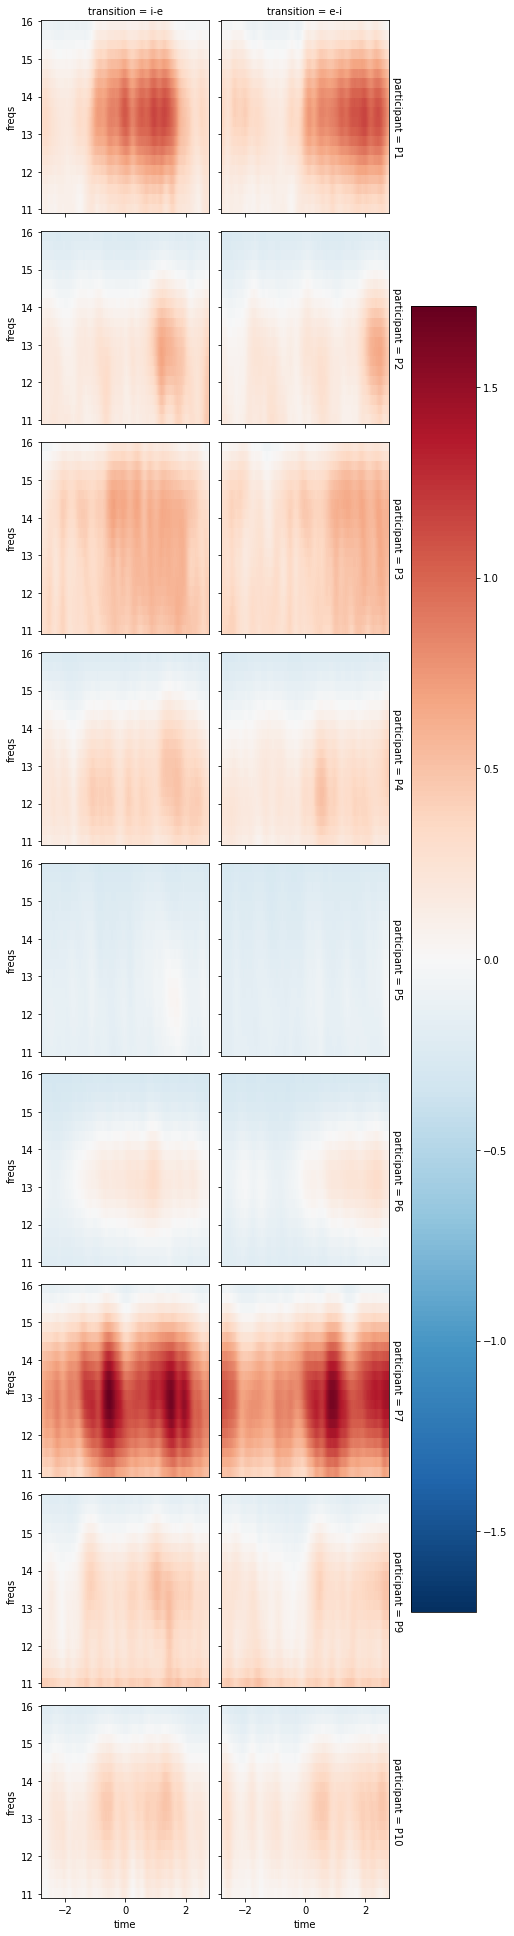

In [89]:
da_erp.mean('cycle').loc['normal',:,:,11:16,:].plot.pcolormesh(x='time', col = 'transition', row ='participant')

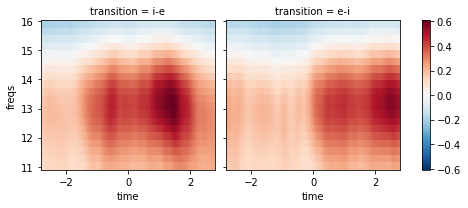

In [90]:
da_erp.mean(['participant','cycle']).loc['normal',:,11:16,:].plot.pcolormesh(x='time', col = 'transition')

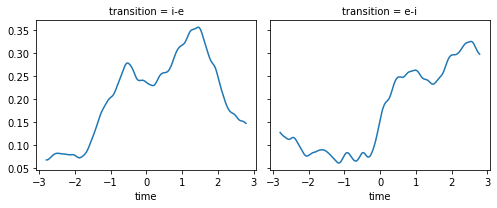

In [91]:
da_erp.mean(['participant','cycle']).loc['normal',:,11:16,:].mean('freqs').plot.line(x='time', col = 'transition')

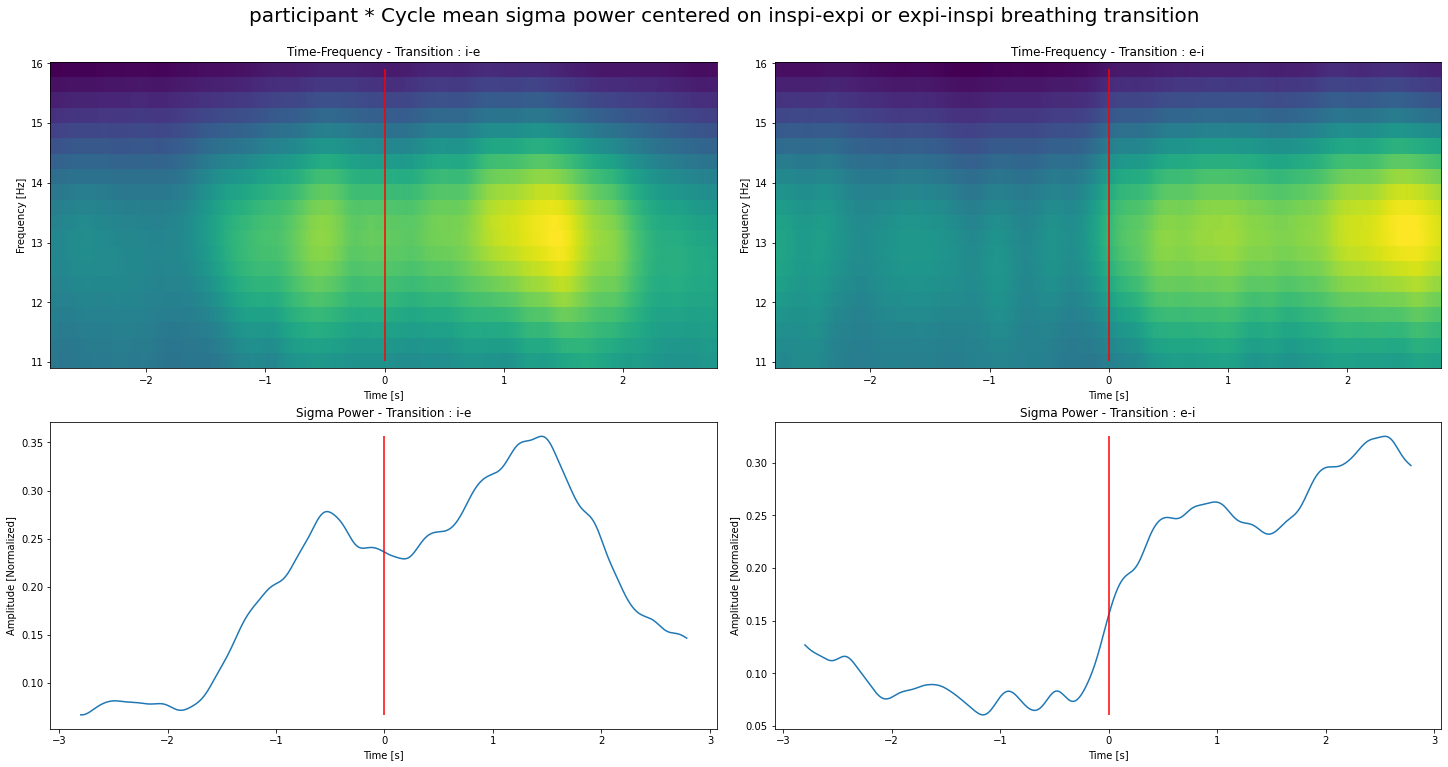

In [93]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10), constrained_layout = True)
fig.suptitle('participant * Cycle mean sigma power centered on inspi-expi or expi-inspi breathing transition', fontsize = 20, y = 1.05)

da_to_plot = da_erp.mean(['participant','cycle']).loc['normal',:,11:16,:]

for row, plot_mode in enumerate(['colormesh', 'line']):
    for col, transition in enumerate(da_to_plot.coords['transition'].values):

        ax = axs[row, col]
        t = da_to_plot.coords['time'].values
        f = da_to_plot.coords['freqs'].values
        data = da_to_plot.loc[transition,:].values

        if plot_mode == 'colormesh':
            ax.pcolormesh(t,f, data)
            ax.vlines(x=0, ymin = min(f), ymax = max(f), color = 'r')
            ax.set_ylabel('Frequency [Hz]')
            ax.set_title(f'Time-Frequency - Transition : {transition}')

        elif plot_mode == 'line':
            ax.plot(t, np.mean(data, axis = 0))
            ax.vlines(x=0, ymin = min(np.mean(data, axis = 0)), ymax = max(np.mean(data, axis = 0)), color = 'r')
            ax.set_ylabel('Amplitude [Normalized]')
            ax.set_title(f'Sigma Power - Transition : {transition}')

        ax.set_xlabel('Time [s]')
        
# plt.savefig('../presentation_3/erp_transition_sam', bbox_inches = 'tight')

In [95]:
rsp.describe()

,inspi_index,expi_index,inspi_time,expi_time,cycle_duration,insp_duration,exp_duration,event
count,3.243000e+04,3.243000e+04,32430.000000,32430.000000,32430.000000,32430.000000,32430.000000,32430.000000
mean,1.823512e+06,1.823872e+06,7123.094955,7124.499067,3.882672,1.404113,2.478559,0.305273
std,1.119161e+06,1.119167e+06,4371.724576,4371.745678,0.729301,0.322582,0.598275,0.460530
min,1.550000e+02,4.340000e+02,0.605469,1.695312,1.847656,0.503906,0.917969,0.000000
25%,8.584430e+05,8.588360e+05,3353.292969,3354.828125,3.402344,1.195312,2.058594,0.000000
50%,1.775516e+06,1.775835e+06,6935.607422,6936.855469,3.843750,1.410156,2.394531,0.000000
75%,2.678237e+06,2.678570e+06,10461.864258,10463.163086,4.273438,1.562500,2.820312,1.000000
max,4.752196e+06,4.752377e+06,18563.265625,18563.972656,13.281250,9.824219,9.847656,1.000000


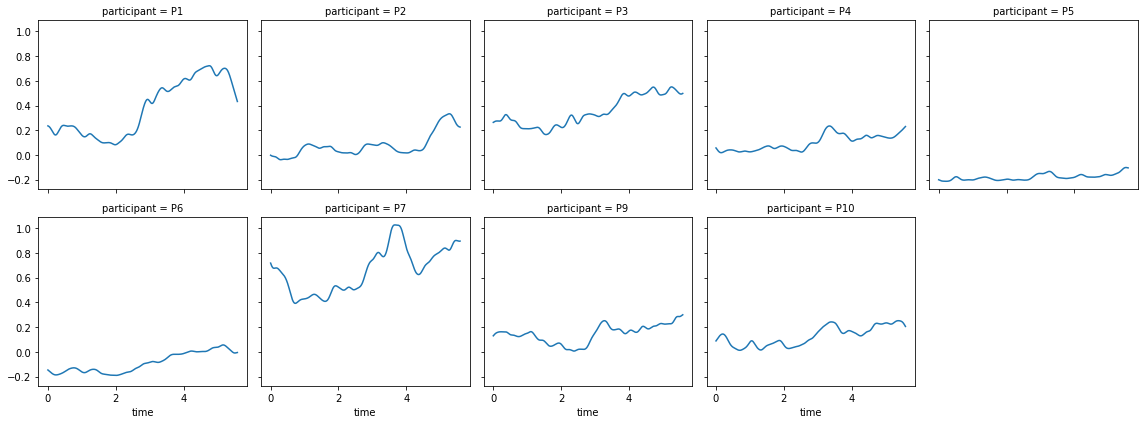

In [80]:
da_erp.mean(['cycle']).loc['normal',:,'e-i',11:16,:].mean('freqs').plot.line(x='time', col = 'participant', col_wrap = 5)
# plt.savefig('../presentation_3/erp_sigma_linepower_participants')